In [1]:
### Test cost estimate for determining low points in dunes

import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate, signal

import xarray as xr
%matplotlib inline

da = xr.open_dataarray('one_meter_test.nc')
(num_maps,ysize,xsize)=np.shape(da.values)
print('Shape of stacked elevation array: ',num_maps,xsize,ysize)

# use meshgrid to make coordinate arrays
X, Y = np.meshgrid( da.coords['Cross-shore'].values, da.coords['Alongshore'].values )
print('Shape of X and Y',np.shape(X),np.shape(Y))

z = np.flip( da[2,500:700,:].values, 0 )
x = np.flip( da.coords['Cross-shore'].values, 0)
# reverse x-axis direction...now starts some arbitrary distance offshore
xr = np.max(x)-x
z[z<0.]=0.
print(z.shape)
print(np.min(z),np.max(z))

Shape of stacked elevation array:  14 280 1300
Shape of X and Y (1300, 280) (1300, 280)
(200, 280)
0.0 6.91104803763


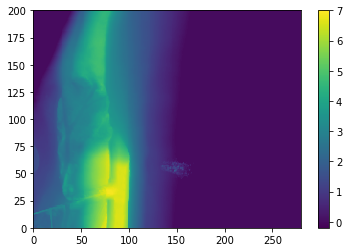

In [4]:
plt.pcolormesh(z,vmin=-.2,vmax=7.)
plt.colorbar()

### Finding lowest point across barrier
* Choose a resolution delz (e.g., 5 cm)
* Start with min elevation zb (e.g., MHW)
* Make cost array, set to one where z>=zb
* Find least-cost path. If it costs > 0, it does not cross at elevation zb
* Increase zb by delz

2.0 53.0
2.05 52.0
2.0999999999999996 50.0
2.1499999999999995 48.0
2.1999999999999993 47.0
2.249999999999999 46.0
2.299999999999999 44.0
2.3499999999999988 43.0
2.3999999999999986 42.0
2.4499999999999984 41.0
2.4999999999999982 40.0
2.549999999999998 39.0
2.599999999999998 37.8284271247
2.6499999999999977 37.0
2.6999999999999975 36.0
2.7499999999999973 35.0
2.799999999999997 34.0
2.849999999999997 33.4142135624
2.899999999999997 32.4142135624
2.9499999999999966 31.2071067812
2.9999999999999964 30.2071067812
3.0499999999999963 26.8284271247
3.099999999999996 24.2426406871
3.149999999999996 22.4142135624
3.1999999999999957 20.2426406871
3.2499999999999956 18.2071067812
3.2999999999999954 16.0
3.349999999999995 15.0
3.399999999999995 12.4142135624
3.449999999999995 11.0
3.4999999999999947 8.0
3.5499999999999945 6.65685424949
3.5999999999999943 6.65685424949
3.649999999999994 4.82842712475
3.699999999999994 3.82842712475
3.749999999999994 2.41421356237
3.7999999999999936 1.41421356237
3.84

Text(0.5,1,'cost: 0.0')

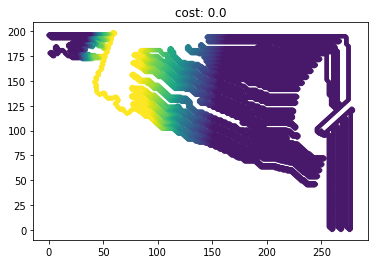

In [5]:
from skimage.graph import route_through_array
# Find the path with lowest cost
cost = 99
delz = 0.05
zb = 2.0-delz

while cost>0:
    zb+=delz
    costz = np.zeros_like(z)
    costz[z>=zb]=1
    indices, cost = route_through_array(costz, [100, 250], [175, 5])
    print(zb,cost)
    
indices = np.array(indices).T
path = np.zeros_like(costz)
path[indices[0], indices[1]] = 1
#plt.pcolormesh(path)
plt.scatter(indices[1],indices[0],12,z[indices[0],indices[1]],vmin=-.2,vmax=3.)
plt.title("cost: "+str(cost))

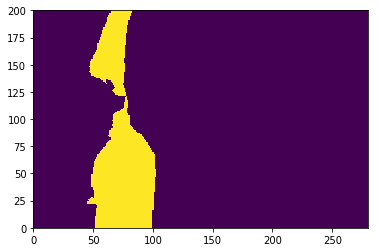

In [17]:
plt.pcolormesh(costz)

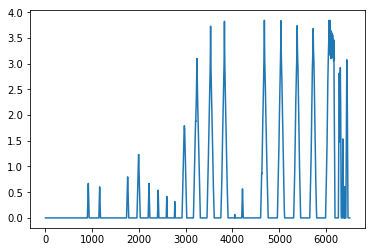

In [6]:
# here is a plot of the elevations along the path
plt.plot(z[indices[0],indices[1]])

In [23]:
idx=np.argmax(z[indices[0],indices[1]])
print(idx)
print(z.ravel()[idx])

6062
0.0


In [27]:
indices.shape
i = indices[0,idx]
j = indices[1,idx]
print(i,j,z[i,j])

121 77 3.84333797411
